In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [32]:


# defining global variable path
image_path = "./data/Training/glioma_tumor/gg (545).jpg"

#function to load folder into arrays and 
#then it returns that same array'''


In [33]:
# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()
# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [34]:
# Preprocessing
def reduce_noise(img):
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    return blur

In [36]:
def segmentation(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Further noise removal
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    return sure_bg, sure_fg, unknown

In [39]:
def image_preprocess(img):
    reduced_noise_img = reduce_noise(img)
    segmented, sure_fg, unknown = segmentation(reduced_noise_img)
    return segmented

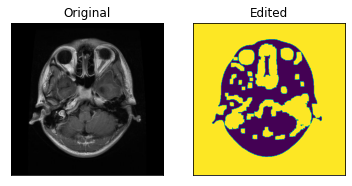

In [40]:
img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
preprocessed = image_preprocess(img)
display(img, segmented)